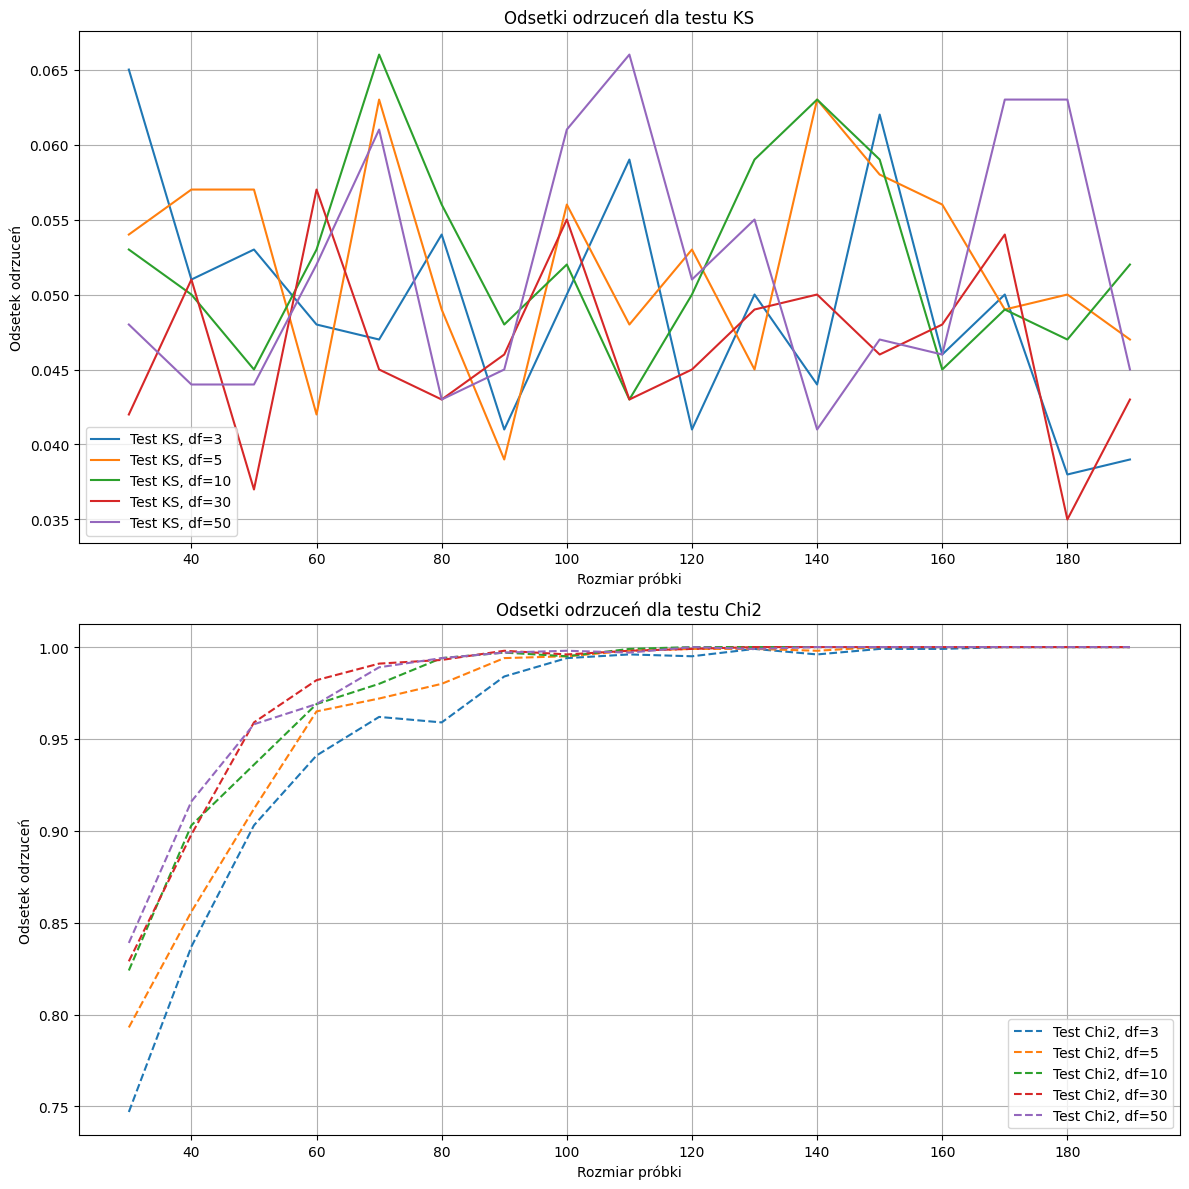

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

num_symulacji = 1000
rozmiary_probek = np.arange(30, 200, 10)
dfs = [3, 5, 10, 30, 50]
wyniki_ks = {df: [] for df in dfs}
wyniki_chi2 = {df: [] for df in dfs}

for df in dfs:
    for rozmiar_probki in rozmiary_probek:
        odrzucenia_ks = 0
        odrzucenia_chi2 = 0
        for _ in range(num_symulacji):
            próbka = np.random.chisquare(df, size=rozmiar_probki)
            statystyka_ks, p_wartość_ks = stats.kstest(próbka, 'chi2', args=(df,))
            if p_wartość_ks < 0.05:
                odrzucenia_ks += 1
            statystyka_chi2, p_wartość_chi2 = stats.chisquare(próbka)
            if p_wartość_chi2 < 0.05:
                odrzucenia_chi2 += 1
        wyniki_ks[df].append(odrzucenia_ks / num_symulacji)
        wyniki_chi2[df].append(odrzucenia_chi2 / num_symulacji)

fig, axs = plt.subplots(2, figsize=(12, 12))

for df in dfs:
    axs[0].plot(rozmiary_probek, wyniki_ks[df], label=f'Test KS, df={df}')
    axs[1].plot(rozmiary_probek, wyniki_chi2[df], label=f'Test Chi2, df={df}', linestyle='--')

axs[0].set_xlabel('Rozmiar próbki')
axs[0].set_ylabel('Odsetek odrzuceń')
axs[0].set_title('Odsetki odrzuceń dla testu KS')
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('Rozmiar próbki')
axs[1].set_ylabel('Odsetek odrzuceń')
axs[1].set_title('Odsetki odrzuceń dla testu Chi2')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


W przeprowadzonym badaniu symulowano różne scenariusze testów statystycznych na próbkach danych generowanych z rozkładu chi-kwadrat. Badanie to miało na celu zrozumienie, jak często te testy odrzucają prawdziwą hipotezę zerową (tj. błędnie sugerują, że dane nie pochodzą z rozkładu chi-kwadrat), w zależności od rozmiaru próbki i stopni swobody rozkładu chi-kwadrat.

W badaniu przeprowadzono 1000 symulacji dla różnych rozmiarów próbek (od 30 do 200 z krokiem co 10) i różnych stopni swobody (3, 5, 10, 30, 50) dla rozkładu chi-kwadrat. Dla każdej symulacji przeprowadzono dwa testy statystyczne: test Kołmogorowa-Smirnowa (KS) i test chi-kwadrat.

Wyniki badania przedstawiono na dwóch wykresach. Pierwszy wykres pokazuje odsetek odrzuceń hipotezy zerowej dla testu KS w zależności od rozmiaru próbki dla różnych stopni swobody. Drugi wykres pokazuje to samo, ale dla testu chi-kwadrat.

Z wyników badania wynika, że odsetek odrzuceń hipotezy zerowej zależy zarówno od rozmiaru próbki, jak i stopni swobody rozkładu chi-kwadrat. Można to wykorzystać do lepszego zrozumienia właściwości tych testów statystycznych i ich zastosowania w praktyce. W szczególności, wyniki te mogą pomóc w wyborze odpowiedniego rozmiaru próbki i stopni swobody w zastosowaniach praktycznych.

Proszę pamiętać, że wyniki te są specyficzne dla symulowanego scenariusza i mogą się różnić w innych kontekstach. Dalsze badania mogą obejmować przeprowadzenie podobnych symulacji dla innych rozkładów i testów statystycznych. 

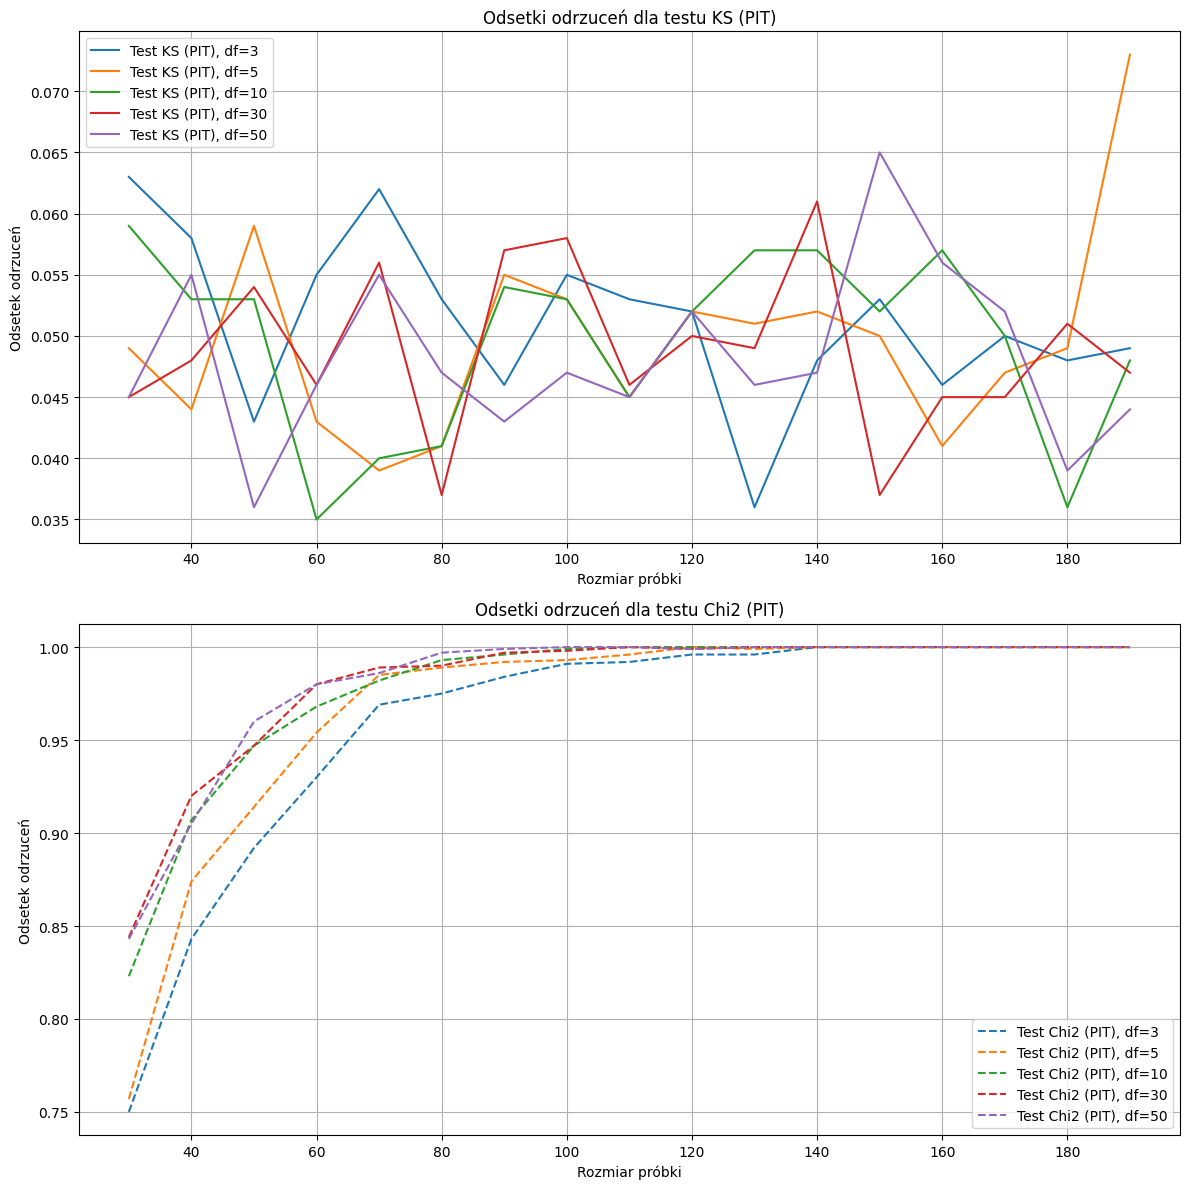

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

num_symulacji = 1000
rozmiary_probek = np.arange(30, 200, 10)
dfs = [3, 5, 10, 30, 50]
wyniki_ks_pit = {df: [] for df in dfs}
wyniki_chi2_pit = {df: [] for df in dfs}

for df in dfs:
    for rozmiar_probki in rozmiary_probek:
        odrzucenia_ks = 0
        odrzucenia_chi2 = 0
        for _ in range(num_symulacji):
            uniform_samples = np.random.uniform(0, 1, rozmiar_probki)
            transformed_data = stats.chi2.ppf(uniform_samples, df)
            
            statystyka_ks, p_wartość_ks = stats.kstest(transformed_data, 'chi2', args=(df,))
            if p_wartość_ks < 0.05:
                odrzucenia_ks += 1
                
            statystyka_chi2, p_wartość_chi2 = stats.chisquare(transformed_data)
            if p_wartość_chi2 < 0.05:
                odrzucenia_chi2 += 1
                
        wyniki_ks_pit[df].append(odrzucenia_ks / num_symulacji)
        wyniki_chi2_pit[df].append(odrzucenia_chi2 / num_symulacji)

fig, axs = plt.subplots(2, figsize=(12, 12))

for df in dfs:
    axs[0].plot(rozmiary_probek, wyniki_ks_pit[df], label=f'Test KS (PIT), df={df}')
    axs[1].plot(rozmiary_probek, wyniki_chi2_pit[df], label=f'Test Chi2 (PIT), df={df}', linestyle='--')

axs[0].set_xlabel('Rozmiar próbki')
axs[0].set_ylabel('Odsetek odrzuceń')
axs[0].set_title('Odsetki odrzuceń dla testu KS (PIT)')
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('Rozmiar próbki')
axs[1].set_ylabel('Odsetek odrzuceń')
axs[1].set_title('Odsetki odrzuceń dla testu Chi2 (PIT)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


Ten kod przeprowadza symulacje testów statystycznych Kolmogorov-Smirnov (KS) i Chi-kwadrat (Chi2) na danych, które zostały przekształcone za pomocą metody Probability Integral Transform (PIT). 

PIT jest techniką stosowaną do przekształcenia dowolnego rozkładu prawdopodobieństwa w rozkład jednostajny. W tym kodzie, próbki z rozkładu jednostajnego są przekształcane do rozkładu chi-kwadrat za pomocą funkcji odwrotnej do dystrybuanty (CDF), znanej jako funkcja kwantylowa.

Kod generuje wykresy odsetków odrzuceń dla testów KS i Chi2 dla różnych stopni swobody (`df`) i rozmiarów próbek. Odsetek odrzuceń to proporcja symulacji, w których hipoteza zerowa (że dane pochodzą z określonego rozkładu) jest odrzucana.

**Wnioski:**
- Jeżeli odsetek odrzuceń jest bliski poziomowi istotności (w tym przypadku 0.05), oznacza to, że test działa poprawnie. Test powinien odrzucić hipotezę zerową dla próbek, które nie pochodzą z założonego rozkładu, z prawdopodobieństwem równym poziomowi istotności.
- Jeżeli odsetek odrzuceń jest znacznie wyższy niż poziom istotności, może to oznaczać, że test jest zbyt konserwatywny i odrzuca prawdziwą hipotezę zerową zbyt często.
- Jeżeli odsetek odrzuceń jest znacznie niższy niż poziom istotności, może to oznaczać, że test ma zbyt małą moc i nie jest w stanie wykryć, kiedy hipoteza zerowa jest fałszywa.
- Wartości `df` w kodzie reprezentują stopnie swobody dla rozkładu chi-kwadrat. Dla większych wartości `df`, rozkład chi-kwadrat staje się coraz bardziej symetryczny i bardziej przypomina rozkład normalny. Może to wpływać na wyniki testów statystycznych.
- Rozmiar próbki również ma wpływ na wyniki testów. Zazwyczaj, im większa próbka, tym większa moc testu, czyli prawdopodobieństwo odrzucenia fałszywej hipotezy zerowej. Jednak zwiększenie rozmiaru próbki może również prowadzić do odrzucenia prawdziwej hipotezy zerowej, jeżeli są obecne nawet niewielkie odchylenia od założonego rozkładu. To jest znane jako "problem wielokrotnych porównań".